In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
#path of the saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/1:1_Hanish_Acharla/Models/ResNet_50_Best_Model.h5')

In [6]:
src_folder = "/content/drive/MyDrive/1:1_Hanish_Acharla/Dataset/Final_Dataset/Test"

In [7]:
import os
#predicted labels
dict_labels = [file for file in os.listdir(src_folder) if os.path.isdir(os.path.join(src_folder, file))]
dict_labels.sort()
dict_labels = dict(enumerate(dict_labels))
print(dict_labels)
entries=os.listdir(src_folder)
file_count=sum(1 for entry in entries if os.path.isfile(os.path.join(src_folder, entry)))
print(file_count)


{0: 'complex', 1: 'frog_eye_leaf_spot', 2: 'healthy', 3: 'powdery_mildew', 4: 'rust', 5: 'scab'}
0


In [ ]:
import os
directory_contents = []
# Find all subfolders in the source folder src_folder
for index in range(0,len(dict_labels)):
  directory_contents.append(dict_labels[index])
print(directory_contents)
# List the files in each subfolder
list_files = []
# Find all the files
for folder_name in directory_contents:
  files_list = os.listdir(os.path.join(src_folder, folder_name))
  list_files.append(files_list)
print(list_files)

['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab']
[['8002cb321f8bfcdf.jpg', '8054952d7a8bacbf.jpg', '81ff35908a9ecf81.jpg', '82fb3ecab8e0b08d.jpg', '8382d879b75e2ac5.jpg', '83e9129f948c5de5.jpg', '845b4ea19d3259bd.jpg', '84e965a9b7b24b54.jpg', '84dbe99149b16937.jpg', '85897ea7f064b26a.jpg', '85cb3b21f8adc156.jpg', '87a5e0dc30674b79.jpg', '895f6a4cc46ceae4.jpg', '8a1ef092b3b6a6d2.jpg', '8a954b82bf81f2bc.jpg', '8acce5ad262e3a78.jpg', '8afa9687aab53506.jpg', '8b4f631bd3d89283.jpg', '8bef10f40efa0a59.jpg', '8cec462ef8f07b28.jpg', '8cfcc02dcf278de0.jpg', '8d5032d4cc1e3e5f.jpg', '8dfb309d029d43cd.jpg', '8feed8d130af2258.jpg', '90403dfe783db658.jpg', '906bb5025ab54fb9.jpg', '90c9ff43a98a54ae.jpg', '90df66a17f502e13.jpg', '92a91fd0b485fa9a.jpg', '92a172553b925b57.jpg', '92ab722d2beb8711.jpg', '92c5cdb008f73f8a.jpg', '93bd7cc46464f511.jpg', '946d48cf9d11e8ea.jpg', '949b6595a5b8ca3c.jpg', '94cdcaa23e732ba4.jpg', '951e95a4736ae24b.jpg', '9560eaccc18fbb98.jpg', '95cd4b

In [ ]:
from keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
# A counter to increment after processing each categoty
category_count = 0
# label list
label = []
# Prediction list
predictions = []
y_score = []
for categories in list_files:
  # Create the labels while iterating over each category
  label_temp = np.ones((len(categories))).astype(int)*category_count
  print(label_temp)
  # Add it to existing labels
  label.extend(label_temp)
  for file_name in categories:
    # test image file
    img_path = src_folder + '/' + directory_contents[category_count] + '/' + file_name
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = loaded_model.predict(img_preprocessed)
    y_score.append(prediction)
    # Save the index of maximum probability
    predictions.append(np.argmax(prediction))
  category_count += 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━

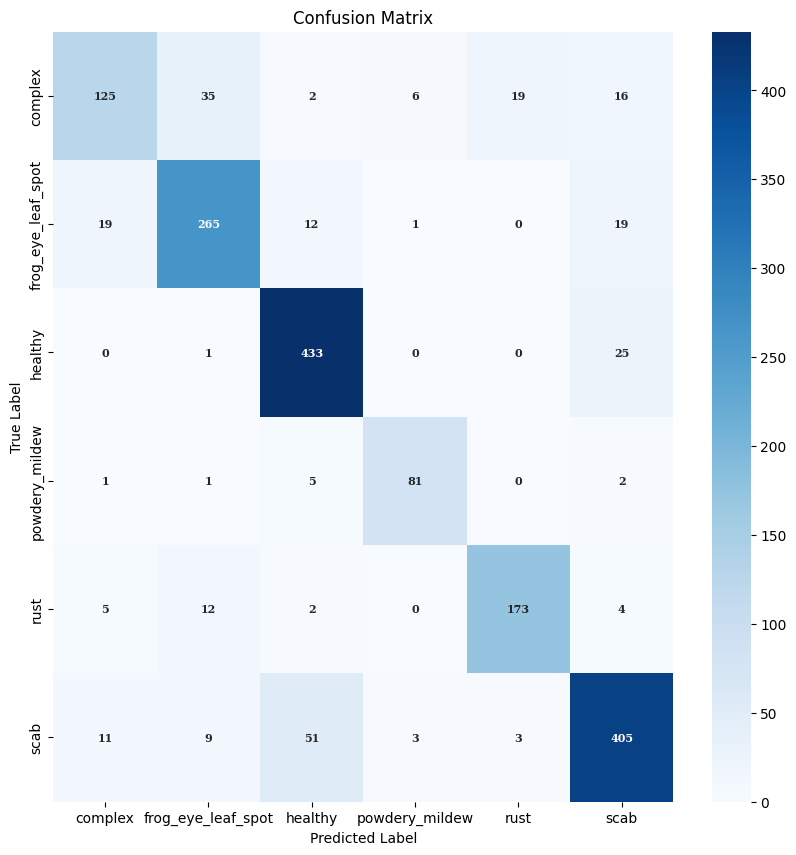

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
display_labels = sorted(directory_contents)
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(label,predictions),
            annot = True,
            fmt = 'g',
            cmap = "Blues",
            xticklabels=display_labels,
            yticklabels = display_labels,
            annot_kws={
                'fontsize': 8,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
#ConfusionMatrixDisplay.from_predictions(label, predictions, display_labels=display_labels, cmap="binary")
plt.show()

In [ ]:
#classification reports
from sklearn.metrics import classification_report
print(classification_report(label,predictions))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69       203
           1       0.82      0.84      0.83       316
           2       0.86      0.94      0.90       459
           3       0.89      0.90      0.90        90
           4       0.89      0.88      0.88       196
           5       0.86      0.84      0.85       482

    accuracy                           0.85      1746
   macro avg       0.85      0.84      0.84      1746
weighted avg       0.85      0.85      0.85      1746

